#### Model Training

##### 1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotliband Seaborn

In [1]:
import numpy as np  # Import the NumPy library, which is used for numerical computations and working with arrays.
import pandas as pd  # Import the Pandas library, which is used for data manipulation and analysis, particularly with DataFrames.
import matplotlib.pyplot as plt  # Import the pyplot module from the Matplotlib library, which is used for creating static visualizations like plots and graphs.
import seaborn as sns  # Import the Seaborn library, which is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics.

Import the CSV Data as Pandas DataFrame


In [2]:
# Reading a CSV file named 'cleaned_data.csv' into a pandas DataFrame and assigning it to the variable 'df'
df = pd.read_csv('../data/cleaned_data.csv')  

Show Top 5 Records

In [3]:
# Displaying the first few rows of the DataFrame 'df'
df.head()  

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1


Shape of the dataset

In [4]:
# Retrieving the Stroke of the DataFrame 'df'
df.shape 

(4981, 11)

In [5]:
# Calculating the sum of missing values (NaN) for each column in the DataFrame 'df'
df.isna().sum() 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Preparing X and Y variables

In [6]:
# independent and dependent features
X = df.drop('stroke',axis=1) #df.iloc[:,:-1]
y = df['stroke'] # df.iloc[:,-1]

#### Apply SMOTE to balance the training data

In [7]:
from imblearn.over_sampling import SMOTE  # Import the SMOTE (Synthetic Minority Over-sampling Technique) class from the imbalanced-learn library, used for handling imbalanced datasets by generating synthetic samples for the minority class.

print('Before:')  # Print a label indicating that the following output shows class distribution before applying SMOTE.
print(y.value_counts())  # Print the counts of each class in the target variable 'y' before applying SMOTE.

smt = SMOTE(random_state=42)  # Create an instance of the SMOTE class with a specified random seed (42) to ensure reproducibility of results.
X_balanced, y_balanced = smt.fit_resample(X, y)  # Apply SMOTE to the feature matrix 'X' and target variable 'y', generating a new balanced dataset (X_balanced, y_balanced).

print('\n\nAfter:')  # Print a label indicating that the following output shows class distribution after applying SMOTE.
print(y_balanced.value_counts())  # Print the counts of each class in the target variable 'y_balanced' after applying SMOTE, showing that the classes are now balanced.

Before:
stroke
0    4733
1     248
Name: count, dtype: int64


After:
stroke
1    4733
0    4733
Name: count, dtype: int64


Now we have balanced data

Train Test split

In [8]:
# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X: features, y: target variable
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=0: setting the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=0)


In [9]:
# Printing the shapes of the feature matrices for the entire dataset, testing set, and training set
print(X.shape, X_test.shape, X_train.shape)


(4981, 10) (1894, 10) (7572, 10)


Data Standarization

In [10]:
# Importing the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Instantiating a StandardScaler object
scaler = StandardScaler()

# Scaling (standardizing) the features in the training set
X_train = scaler.fit_transform(X_train)

# Scaling (standardizing) the features in the testing set
X_test = scaler.transform(X_test)


#### Training the Model

In [11]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# # Build the neural network model
# model = Sequential([
#     Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer and first hidden layer
#     Dropout(0.5),
#     Dense(32, activation='relu'),  # Second hidden layer
#     Dropout(0.5),
#     Dense(16, activation='relu'),  # Third hidden layer
#     Dense(1, activation='sigmoid')  # Output layer
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# # Evaluate the model on the test data
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# print(f'Test Loss: {test_loss}')
# print(f'Test Accuracy: {test_accuracy}')

1. Logistic Regression

In [12]:
# Importing the LogisticRegression class from the sklearn.linear_model module
from sklearn.linear_model import LogisticRegression

# Creating a LogisticRegression object
lr = LogisticRegression()
# Train the model on the training data
lr.fit(X_train,y_train)

LogisticRegression()

2. Support Vector Machine SVM

In [13]:
# Importing the SVC (Support Vector Classifier) class from the sklearn.svm module
from sklearn.svm import SVC

# Creating an SVC object
svm = SVC(probability=True)
# Train the model on the training data
svm.fit(X_train,y_train)

SVC(probability=True)

3. Gradient Boosting 

In [14]:
# Importing the GradientBoostingClassifier class from the sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier

# Initialize a Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

4. Decision Tree

In [15]:
# Importing the DecisionTreeClassifier class from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiating a DecisionTreeClassifier object
dt = DecisionTreeClassifier()

# Fitting the decision tree model to the training data
dt.fit(X_train, y_train)


DecisionTreeClassifier()

5. Random Forest

In [16]:
# Importing the RandomForestClassifier class from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

# Instantiating a RandomForestClassifier object
rf = RandomForestClassifier()

# Fitting the random forest model to the training data
rf.fit(X_train, y_train)


RandomForestClassifier()

6. Voting Classifier

In [17]:
from sklearn.ensemble import VotingClassifier  # Import the VotingClassifier class from the sklearn.ensemble module, which is used for creating an ensemble model that combines multiple models to make a final prediction.

# Ensemble Model: Voting Classifier (Combining Decision Tree, Random Forest, and Gradient Boosting)
voting_ensemble = VotingClassifier(estimators=[
    ('decision_tree', dt),  # Include a Decision Tree model in the ensemble, referenced by the name 'decision_tree'.
    ('random_forest', rf),  # Include a Random Forest model in the ensemble, referenced by the name 'random_forest'.
    ('gradient_boosting', gb)  # Include a Gradient Boosting model in the ensemble, referenced by the name 'gradient_boosting'.
], voting='hard')  # Specify that the voting method is 'hard', meaning the final prediction is based on the majority vote from all the models.

voting_ensemble.fit(X_train, y_train)  # Train the VotingClassifier ensemble model on the training data (X_train, y_train).


VotingClassifier(estimators=[('decision_tree', DecisionTreeClassifier()),
                             ('random_forest', RandomForestClassifier()),
                             ('gradient_boosting',
                              GradientBoostingClassifier(random_state=42))])

Models objects and names

In [18]:
# Define models list
models = [lr, gb, svm, dt, rf,voting_ensemble]
# List of model names
models_names = ["Logistic Regression",  "Gradient Boosting", "Support Vector Machine", "Decision Tree", "Random Forest","Voting Ensemble"]

### Assess the complexity of each model

In [19]:
# Define the refined complexity assessment function
def assess_model_complexity(model):
    try:
        num_parameters = model._get_param_names()  # Get the names of hyperparameters
    except:
        num_parameters = "Unknown"
    
    # Simplified measure of computational complexity based on model type
    if hasattr(model, "decision_function"):
        computational_complexity = "High" 
    elif hasattr(model, "predict_proba"):
        computational_complexity = "Medium"
    else:
        computational_complexity = "Low"
    
    # Interpretability based on whether the model has feature importances or coefficients
    if hasattr(model, "feature_importances_"):
        interpretability = "High"
    elif hasattr(model, "coef_"):
        interpretability = "Medium"
    else:
        interpretability = "Low"
    
    return num_parameters, computational_complexity, interpretability

# Initialize an empty list to store the rows of the table
table_data = []

# Populate the table data with the complexity assessment for each model
for model, model_name in zip(models, models_names):
    num_parameters, computational_complexity, interpretability = assess_model_complexity(model)
    table_data.append([model_name, len(num_parameters) if isinstance(num_parameters, list) else num_parameters, computational_complexity, interpretability])

# Define the headers for the table
headers = ["Model", "Num Hyperparameters", "Computational Complexity", "Interpretability"]

# Convert the table data to a DataFrame
df = pd.DataFrame(table_data, columns=headers)




In [21]:
# Display the DataFrame
display(df)

,Model,Num Hyperparameters,Computational Complexity,Interpretability
0,Logistic Regression,15,High,Medium
1,Gradient Boosting,20,High,High
2,Support Vector Machine,15,High,Low
3,Decision Tree,12,Medium,High
4,Random Forest,18,Medium,High
5,Voting Ensemble,6,Low,Low


#### Plot Feature Importance

In [21]:
# Define a function to plot feature importance
def plot_feature_importance(model, feature_names, ax=None):
    # Get feature importances and sort them
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)

    # Create a new figure and axis if not provided
    if ax is None:
        ax = plt.subplots()

    # Plot feature importance
    ax.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    ax.set_yticks(range(len(sorted_idx)))
    ax.set_yticklabels([feature_names[i] for i in sorted_idx])
    ax.set_xlabel('Importance')
    ax.set_title('Feature Importance')

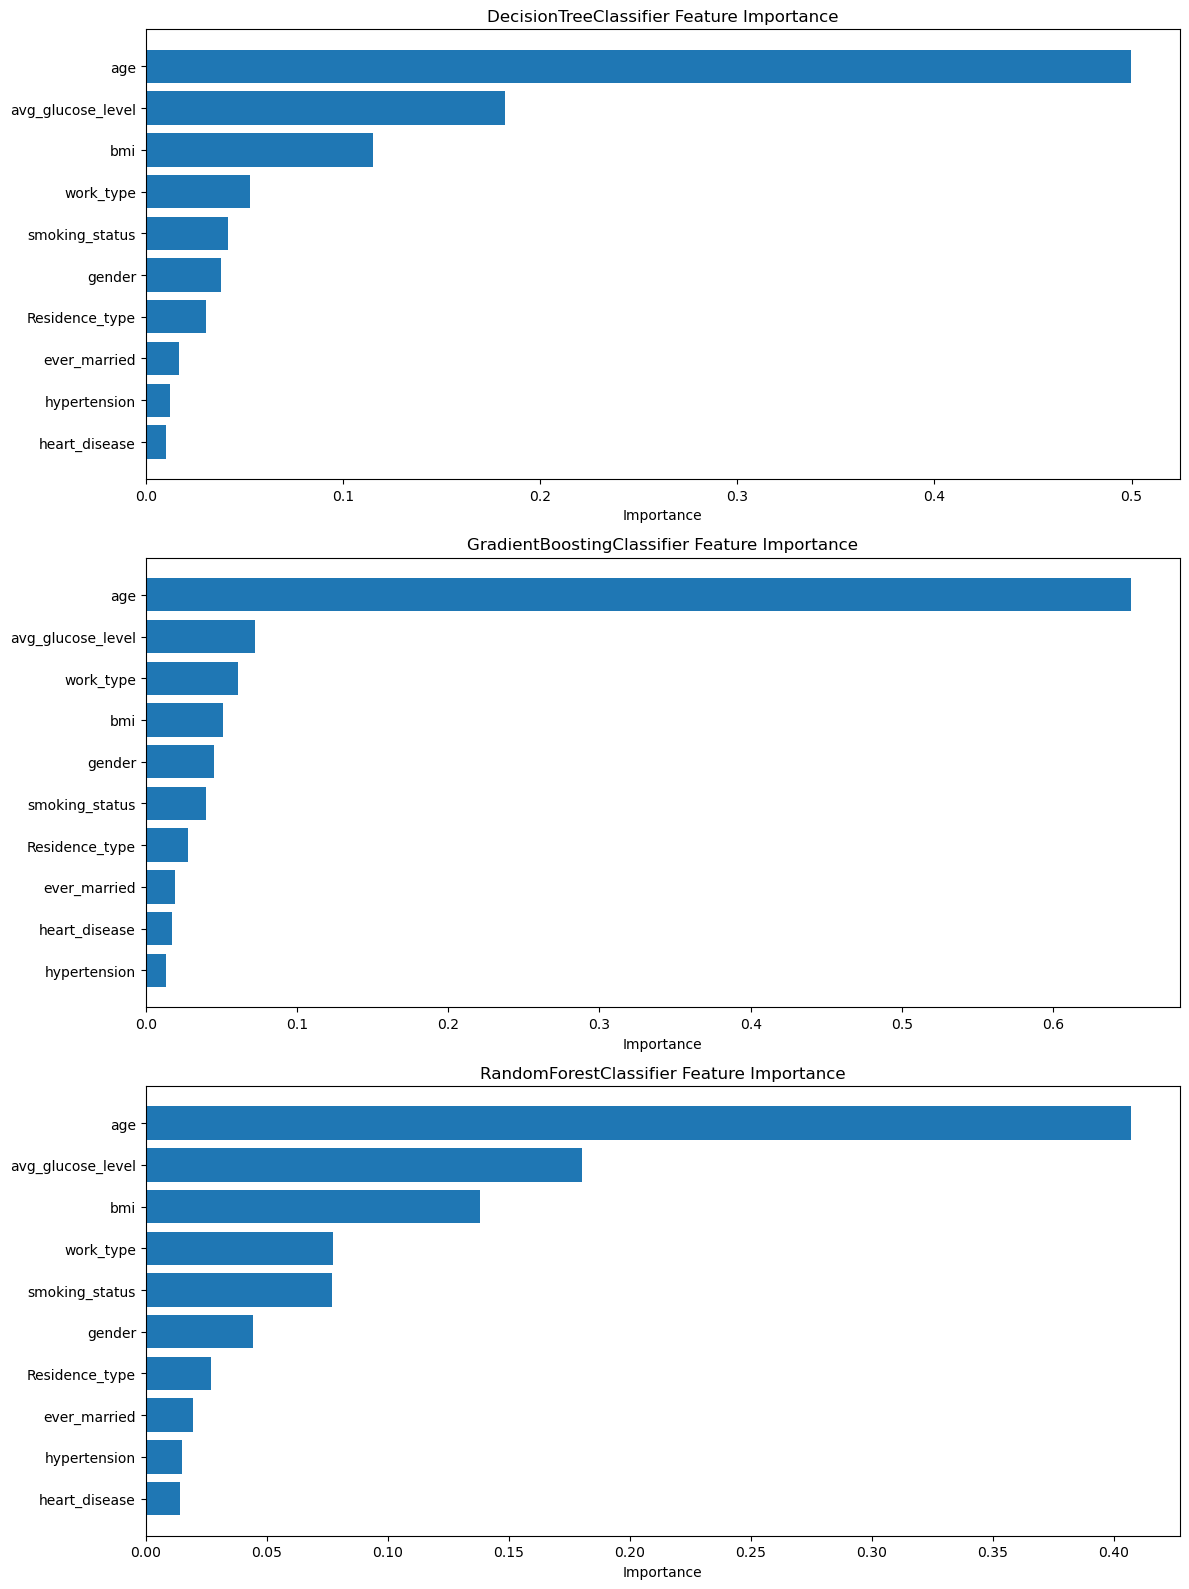

In [22]:
# Plot visualizations for each model
feature_importance_models = [dt,gb,rf]  # Assuming these are your trained models

# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(feature_importance_models):
       plot_feature_importance(model, X.columns, ax=axes[i])
       axes[i].set_title(f"{model.__class__.__name__} Feature Importance")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Plot Learning Curve

In [23]:
# Import necessary functions/classes from sklearn
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X_train, y_train_balanced, cv=None, n_jobs=-1, ax=None):
    # Generate learning curves using learning_curve function
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train_balanced, cv=cv, n_jobs=n_jobs)
    # Compute mean and standard deviation of training scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    # Compute mean and standard deviation of test scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Create a new figure and axis if not provided
    if ax is None:
        fig, ax = plt.subplots()
    
    # Fill the area between the training score curves
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    # Fill the area between the test score curves
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    # Plot the training score curve
    ax.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    # Plot the cross-validation score curve
    ax.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    # Set title of the plot
    ax.set_title(title)
    # Set label for x-axis
    ax.set_xlabel("Training examples")
    # Set label for y-axis
    ax.set_ylabel("Score")
    # Add legend to the plot
    ax.legend(loc="best")


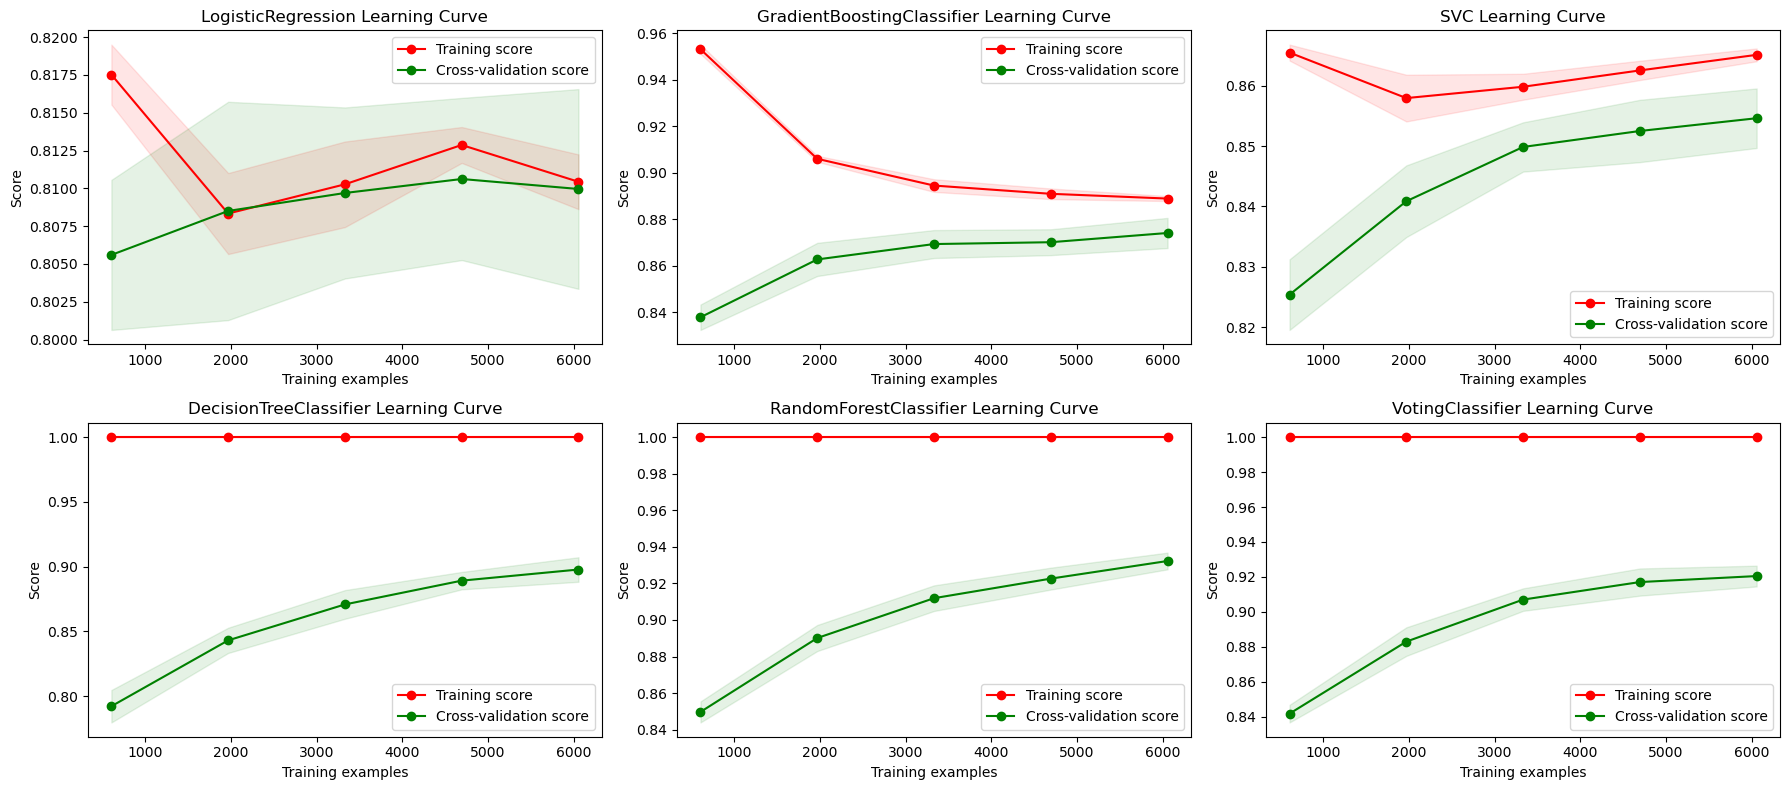

In [24]:
# Define the layout of the grid
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(models):
    plot_learning_curve(model, f"{model.__class__.__name__} Learning Curve", X_train, y_train, cv=5, ax=axes[i])

    # Set title for each subplot
    axes[i].set_title(f"{model.__class__.__name__} Learning Curve")

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### Evaluation Metrics
#### Confusion Matrix, accuracy, precision, recall, f1 score

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

# Define a function to compute specificity
def specificity_score(y_true, y_pred):
    # Compute confusion matrix and unpack values
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Compute specificity 
    specificity = tn / (tn + fp)
    return specificity

# Define a function to compute evaluation metrics for all models
def evaluate_all_models(models, X_test, y_test):
    # Define lists to store evaluation metrics for test sets
    models_confusion_matrix = []
    models_metrics = []

    # Loop through each model
    for model in models:
        # Compute evaluation metrics for the model
        model_metrics = compute_evaluation_metrics(model, X_test, y_test)
        
        # Append insights to the respective lists
        models_metrics.append(model_metrics)

    # Create DataFrame for test sets
    models_metrics_df = pd.DataFrame(models_metrics)

    # Select columns for the Confusion matrix DataFrame
    cm_columns_to_select = ["Model", "Confusion Matrix", "TP", "FP", "TN", "FN"]

    # Select columns for the metrics DataFrame
    metrics_columns_to_select = ["Model", "Accuracy", "Precision", "Recall/sensitivity", "Specificity", "F1-score"]

    return models_metrics_df[cm_columns_to_select], models_metrics_df[metrics_columns_to_select]

# Define a function to compute evaluation metrics for a single model
def compute_evaluation_metrics(model, X_test, y_test):
    # Predict on test set
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Extract TP, FP, TN, FN from confusion matrix
    tn, fp, fn, tp = cm.ravel()  # Extract values from confusion matrix
    
    # Compute evaluation metrics for test set
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = specificity_score(y_test, y_pred)  # Calculate specificity
    f_score = f1_score(y_test, y_pred)
    
    # Store confusion matrix and metrics df
    metrics = {
        "Model": model.__class__.__name__,
        "Confusion Matrix": cm,
        "TP": tp, "FP": fp, "TN": tn, "FN": fn,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall/sensitivity": recall,
        "Specificity": specificity,
        "F1-score": f_score,
       
    }
    
    return metrics



Plot Confusion Meatrix


In [26]:
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix for all the models
def plot_confusion_matrix(models_names, models_cm):
    
    # Plot confusion matrices for each model in a grid
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a 2x3 grid of subplots
    for i, title in enumerate(models_names):  # Iterate over models
        row = i // 3  # Calculate row index
        col = i % 3  # Calculate column index
        ax = axes[row, col]
        # Plot confusion matrix
        sns.heatmap(models_cm[i], annot=True, fmt='d', cmap='YlGnBu', cbar=False, ax=ax)  # Plot heatmap with annotations
        ax.set_xlabel('Predicted labels')  # Set x-axis label
        ax.set_ylabel('Actual labels')  # Set y-axis label
        ax.set_title(title)  # Set title

    plt.tight_layout()  # Adjust subplot layout to make plots fit into the figure area
    plt.show()  # Show the plots

## Evaluate the models

In [27]:
# compute evaluation metrics for all models
models_cm_df, models_metrics_df = evaluate_all_models(models, X_test, y_test)

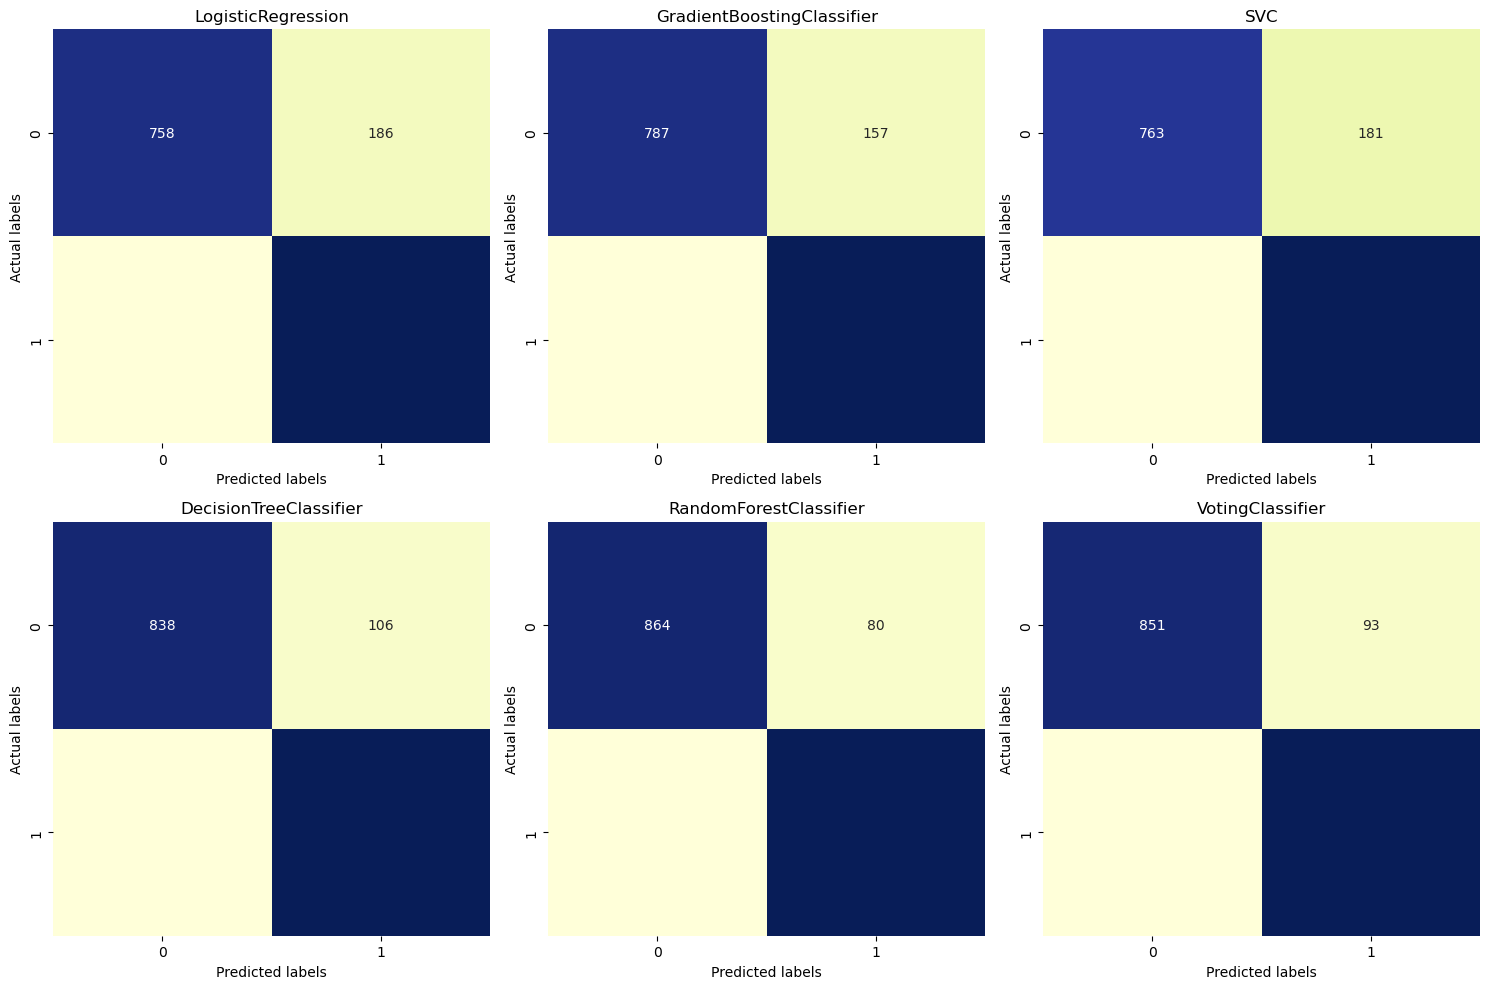

In [28]:
#Plot Confusion Matrix
plot_confusion_matrix(models_cm_df["Model"], models_cm_df["Confusion Matrix"])

In [29]:
# Display the confusion matrix
print("\nConfusion Matrix :")
display(models_cm_df[["Model", "TP", "FP", "TN", "FN"]])


Confusion Matrix :


,Model,TP,FP,TN,FN
0,LogisticRegression,821,186,758,129
1,GradientBoostingClassifier,856,157,787,94
2,SVC,867,181,763,83
3,DecisionTreeClassifier,884,106,838,66
4,RandomForestClassifier,909,80,864,41
5,VotingClassifier,903,93,851,47


In each cell, "TP" represents True Positives, "FP" represents False Positives, and "FN" represents False Negatives. "TN" represents True Negatives. These values are filled in for both the neutral or dissatisfied and satisfied classes for each model.

In [30]:
# Display the performance metrics DataFrame
print("\nTest Set Evaluation Metrics :")
display(models_metrics_df)


Test Set Evaluation Metrics :


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score
0,LogisticRegression,0.833685,0.815293,0.864211,0.802966,0.839039
1,GradientBoostingClassifier,0.867476,0.845015,0.901053,0.833686,0.872134
2,SVC,0.860612,0.827290,0.912632,0.808263,0.867868
3,DecisionTreeClassifier,0.909187,0.892929,0.930526,0.887712,0.911340
4,RandomForestClassifier,0.936114,0.919110,0.956842,0.915254,0.937597
5,VotingClassifier,0.926082,0.906627,0.950526,0.901483,0.928058


#### Best Parmeters for Models

In [31]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score  # Import functions to create custom scorers and metrics for model evaluation: accuracy_score, precision_score, and recall_score.
from sklearn.model_selection import GridSearchCV, KFold  # Import GridSearchCV for hyperparameter tuning and KFold for cross-validation.

models = [lr, gb, dt, rf, voting_ensemble]  # List of models to be evaluated and tuned, including logistic regression (lr), gradient boosting (gb), decision tree (dt), random forest (rf), and the voting ensemble model.

# Define hyperparameter grids corresponding to each model
param_grid_lr = {  # Hyperparameter grid for logistic regression (lr).
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength.
    'penalty': ['l2']  # Regularization type.
}

param_grid_gb = {  # Hyperparameter grid for gradient boosting (gb).
    'n_estimators': [100, 200, 300],  # Number of boosting stages.
    'max_depth': [3, 5, 7],  # Maximum depth of the trees.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node.
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split.
}

param_grid_dt = {  # Hyperparameter grid for decision tree (dt).
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node.
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when looking for the best split.
}

param_grid_rf = {  # Hyperparameter grid for random forest (rf).
    'n_estimators': [100, 200, 300],  # Number of trees in the forest.
    'max_depth': [10, 20, 30],  # Maximum depth of the trees.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node.
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split.
}

param_grid_voting_ensemble = {  # Hyperparameter grid for the voting ensemble model.
    'voting': ['hard', 'soft']  # Type of voting: 'hard' (majority vote) or 'soft' (average of predicted probabilities).
}

# Map the parameter grids to models
param_grids = [param_grid_lr, param_grid_gb, param_grid_dt, param_grid_rf, param_grid_voting_ensemble]  # List of parameter grids corresponding to each model in the 'models' list.

# Scoring functions
scorers = {  # Dictionary of scoring functions to evaluate the models during GridSearchCV.
    'accuracy_score': make_scorer(accuracy_score),  # Scorer for accuracy.
    'precision_score': make_scorer(precision_score),  # Scorer for precision.
    'recall_score': make_scorer(recall_score)  # Scorer for recall.
}

# Iterate over models and their corresponding grids
for model, param_grid in zip(models, param_grids):  # Loop through each model and its corresponding hyperparameter grid.
    # Define K-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Initialize K-fold cross-validation with 5 splits, shuffling the data, and using a fixed random state for reproducibility.
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring=scorers, refit='recall_score', n_jobs=-1)  # Set up GridSearchCV with the model, parameter grid, cross-validation method, scoring metrics, and use recall as the refit criterion. Use all available cores with 'n_jobs=-1'.
    grid_search.fit(X_train, y_train)  # Fit the model using GridSearchCV on the training data.

    # Retrieve best parameters and best scores
    best_params = grid_search.best_params_  # Get the best hyperparameters found by GridSearchCV.
    best_scores = grid_search.cv_results_  # Get the cross-validation results, including scores for each combination of hyperparameters.

    # Update model with best parameters and fit the model
    model.set_params(**best_params)  # Update the model with the best hyperparameters found.
    model.fit(X_train, y_train)  # Refit the model on the entire training dataset using the best hyperparameters.

    # Print best parameters and best scores
    print(f"Model after using best parameters: {model}")  # Print the model with its updated parameters.
    print(f"Best Parameters for {model.__class__.__name__}: {best_params}")  # Print the best hyperparameters for the model.
    print(f"Best Scores for {model.__class__.__name__}:")  # Print the best scores for the model.
    for scorer in scorers:  # Loop through each scoring metric.
        print(f"{scorer}: {best_scores['mean_test_' + scorer][grid_search.best_index_]}")  # Print the mean test score for each scoring metric using the best hyperparameters.
    print()  # Print a newline for better readability.


Model after using best parameters: LogisticRegression(C=0.001)
Best Parameters for LogisticRegression: {'C': 0.001, 'penalty': 'l2'}
Best Scores for LogisticRegression:
accuracy_score: 0.8033531701915237
precision_score: 0.7791528863045001
recall_score: 0.846470043978087

Model after using best parameters: GradientBoostingClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=2,
                           min_samples_split=5, n_estimators=300,
                           random_state=42)
Best Parameters for GradientBoostingClassifier: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Scores for GradientBoostingClassifier:
accuracy_score: 0.9440039935301323
precision_score: 0.9307765203718381
recall_score: 0.9593544872363987

Model after using best parameters: DecisionTreeClassifier(max_depth=10)
Best Parameters for DecisionTreeClassifier: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_spl

###  Evaluate The models after Parameters tuning

In [32]:
models = [lr, gb, svm, dt, rf,voting_ensemble]
# compute evaluation metrics for all models
models_cm_df, models_metrics_df = evaluate_all_models(models, X_test, y_test)

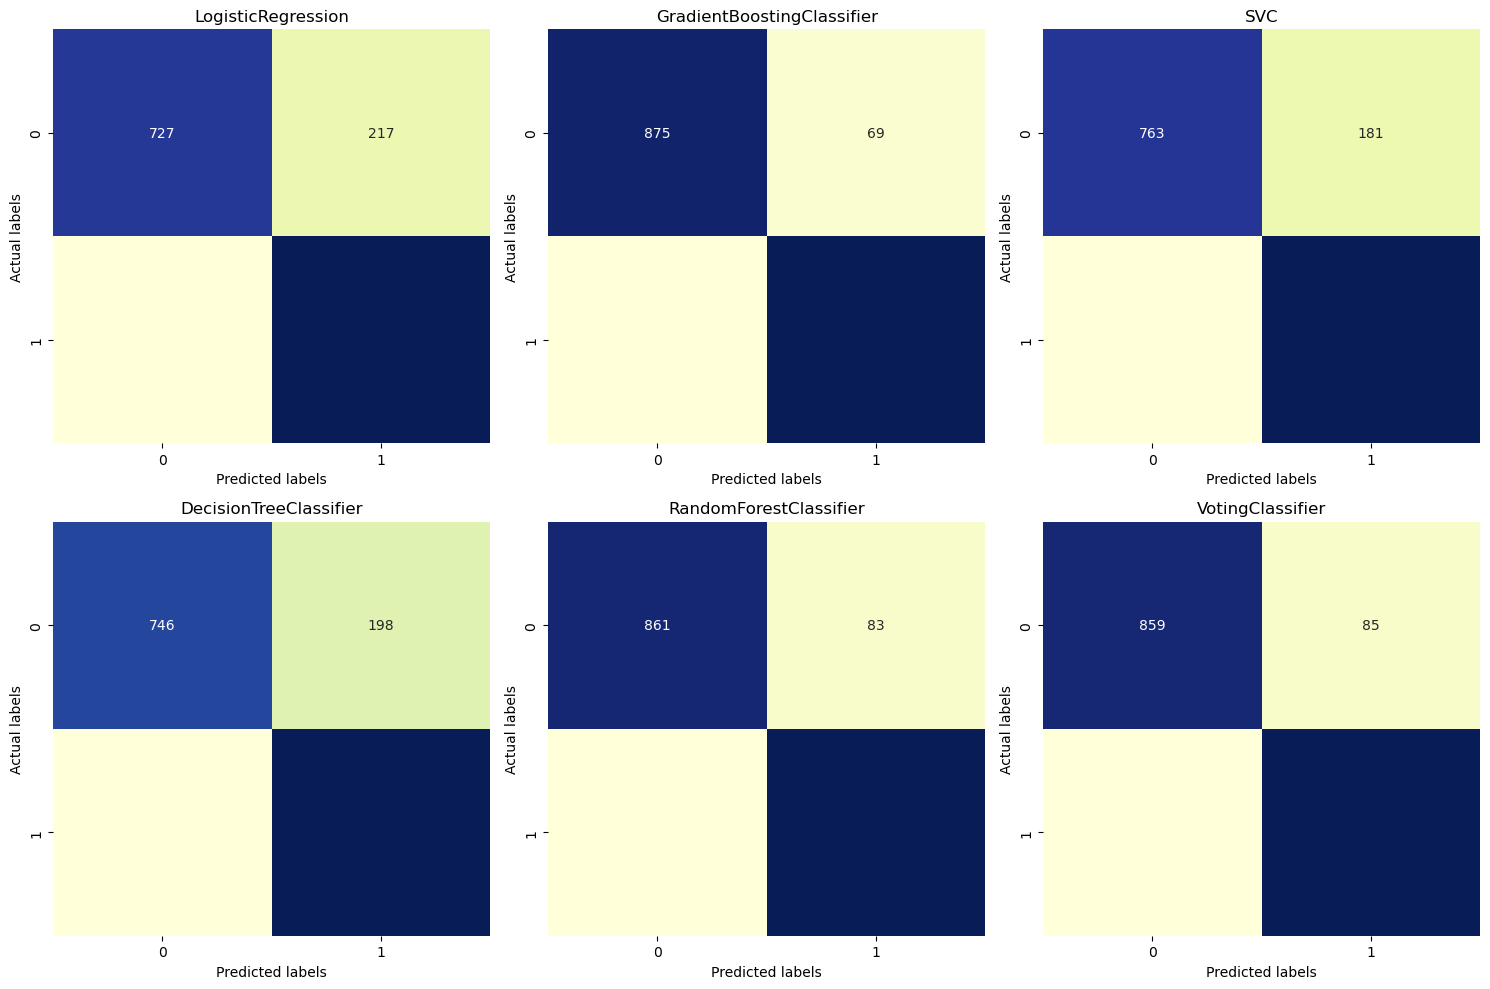

In [33]:
plot_confusion_matrix(models_cm_df["Model"], models_cm_df["Confusion Matrix"])  # Call the function `plot_confusion_matrix` to generate and display confusion matrices for each model. The models and their corresponding confusion matrices are retrieved from the 'Model' and 'Confusion Matrix' columns of the DataFrame 'models_cm_df'.


In [34]:
# Display the confusion matrix
print("\nConfusion Matrix after tuning:")
# display DataFrame
display(models_cm_df[["Model", "TP", "FP", "TN", "FN"]])


Confusion Matrix after tuning:


,Model,TP,FP,TN,FN
0,LogisticRegression,824,217,727,126
1,GradientBoostingClassifier,910,69,875,40
2,SVC,867,181,763,83
3,DecisionTreeClassifier,900,198,746,50
4,RandomForestClassifier,911,83,861,39
5,VotingClassifier,912,85,859,38


In [35]:
# Display the performance metrics DataFrame
print("\nTest Set Evaluation Metrics after tuning:")
display(models_metrics_df)


Test Set Evaluation Metrics after tuning:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score
0,LogisticRegression,0.818902,0.791547,0.867368,0.770127,0.827725
1,GradientBoostingClassifier,0.942450,0.929520,0.957895,0.926907,0.943494
2,SVC,0.860612,0.827290,0.912632,0.808263,0.867868
3,DecisionTreeClassifier,0.869060,0.819672,0.947368,0.790254,0.878906
4,RandomForestClassifier,0.935586,0.916499,0.958947,0.912076,0.937243
5,VotingClassifier,0.935058,0.914744,0.960000,0.909958,0.936826


In [36]:
# compute evaluation metrics for all models
models_cm_df, models_metrics_df = evaluate_all_models(models, X_test, y_test)

# Calculate the overall score for each model using a specified equation
for model in models:
    # Retrieve the evaluation metrics for the test set
    metrics = models_metrics_df[models_metrics_df['Model'] == model.__class__.__name__].iloc[0]
    # Calculate the overall score for the model
    score = (metrics['Accuracy']  +  metrics['F1-score']+ metrics['Specificity']) / 3
    # Add the score to the DataFrame
    models_metrics_df.loc[models_metrics_df['Model'] == model.__class__.__name__, 'Score'] = score
print("\nBest Model:")
display(models_metrics_df)
# Find the model with the highest score
best_score = models_metrics_df['Score'].max()
best_model = models_metrics_df[models_metrics_df['Score'] == best_score]
print("\nBest Model:")
display(best_model)


Best Model:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score,Score
0,LogisticRegression,0.818902,0.791547,0.867368,0.770127,0.827725,0.805585
1,GradientBoostingClassifier,0.942450,0.929520,0.957895,0.926907,0.943494,0.937617
2,SVC,0.860612,0.827290,0.912632,0.808263,0.867868,0.845581
3,DecisionTreeClassifier,0.869060,0.819672,0.947368,0.790254,0.878906,0.846074
4,RandomForestClassifier,0.935586,0.916499,0.958947,0.912076,0.937243,0.928302
5,VotingClassifier,0.935058,0.914744,0.960000,0.909958,0.936826,0.927281



Best Model:


,Model,Accuracy,Precision,Recall/sensitivity,Specificity,F1-score,Score
1,GradientBoostingClassifier,0.94245,0.92952,0.957895,0.926907,0.943494,0.937617


#### Plot precision_recall_curve

In [37]:
from sklearn.metrics import precision_recall_curve  # Import the precision_recall_curve function from sklearn.metrics, which computes precision-recall pairs for different threshold values.

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, model_name, ax):  # Define a function to plot precision and recall as a function of decision thresholds.
    """
    Plot precision and recall scores as a function of the decision threshold.
    
    Parameters:
        precisions (array-like): Precision scores.
        recalls (array-like): Recall scores.
        thresholds (array-like): Decision thresholds.
        model_name (str): Name of the model.
        ax (matplotlib axes): Axes to plot on.
    """
    
    ax.plot(thresholds, precisions[:-1], "b--", label="Precision")  # Plot precision scores against decision thresholds on the provided axes, using a dashed blue line.
    ax.plot(thresholds, recalls[:-1], "g-", label="Recall")  # Plot recall scores against decision thresholds on the provided axes, using a solid green line.
    ax.set_ylabel("Score")  # Label the y-axis as "Score".
    ax.set_xlabel("Decision Threshold")  # Label the x-axis as "Decision Threshold".
    ax.set_title(f"Precision and Recall Scores as a Function of Decision Threshold ({model_name})")  # Set the plot title, including the model's name.
    ax.legend(loc='best')  # Add a legend to the plot, positioning it in the best location automatically.


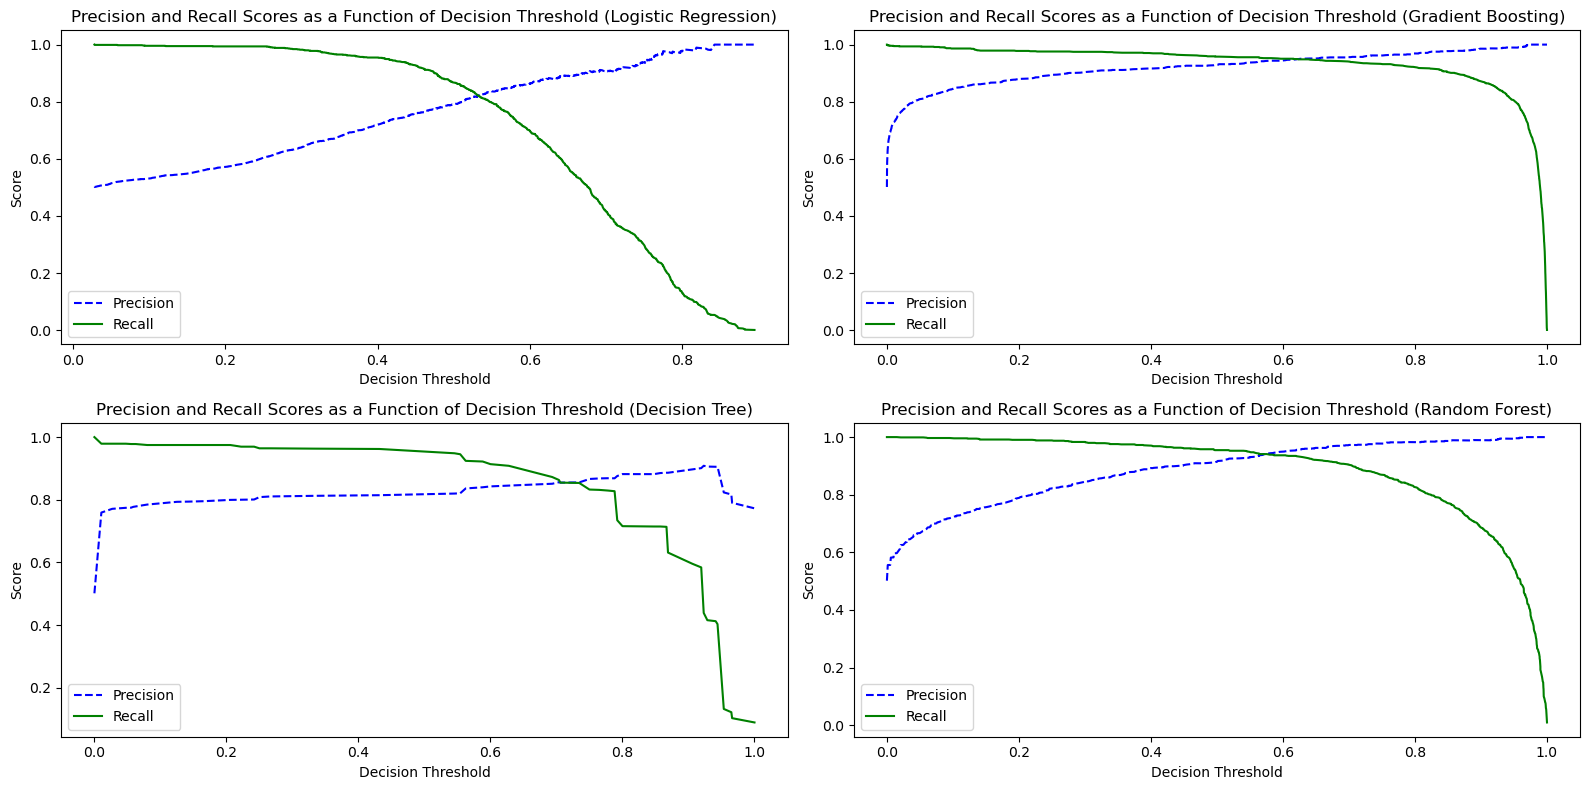

In [38]:
# Define the models
precision_recall_curve_models = [lr,  gb, dt, rf]
model_names = ["Logistic Regression",  "Gradient Boosting", "Decision Tree", "Random Forest"]
# Calculate the number of plots based on the number of numerical columns
num_plots = len(precision_recall_curve_models)
# Define the number of rows and columns for the grid layout
num_rows = 2
num_cols = 2

# Create a figure and a set of subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 8))
# Flatten the axes array to simplify indexing
axes = axes.flatten()
# Flatten the axes if necessary
if num_rows == 1:
    axes = [axes]

# Plot precision-recall curves for each model
for i, (model, name) in enumerate(zip(precision_recall_curve_models, model_names)):
    ax = axes[i]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Compute precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    
    # Plot precision-recall vs threshold
    plot_precision_recall_vs_threshold(precision, recall, thresholds, name, ax)
# Hide empty subplots beyond the number of plots
for i in range(num_plots, num_rows*num_cols):
    axes[i].axis('off')  # Turn off axis for empty subplots
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

ROC Curve

In [39]:
import numpy as np

def roc_threshold( y_scores, threshold):
    """
    Modify predicted labels based on the ROC curve threshold.

    Parameters:
        y_scores (array-like): Predicted probabilities for the positive class.
        threshold (float): Threshold value for the ROC curve.

    Returns:
        array-like: Modified predicted labels based on the threshold.
    """
    # Convert probabilities to binary predictions based on the threshold
    y_pred = np.where(y_scores >= threshold, 1, 0)
    
    return y_pred

In [40]:
# Define the models
models = [lr, svm, gb, dt, rf]
model_names = ["Logistic Regression", "Support Vector Machine", "Gradient Boosting", "Decision Tree", "Random Forest"]
# Define a function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, ax=None):
    # Predict probabilities for positive class
    y_score = model.predict_proba(X_test)[:, 1]
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Create a new figure and axis if not provided
    if ax is None:
        fig, ax = plt.subplots()

    # Plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    # Plot the diagonal dashed line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # Set limits for x-axis
    ax.set_xlim([0.0, 1.0])
    # Set limits for y-axis
    ax.set_ylim([0.0, 1.05])
    # Set label for x-axis
    ax.set_xlabel('False Positive Rate')
    # Set label for y-axis
    ax.set_ylabel('True Positive Rate')
    # Set title of the plot
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    # Add legend to the plot
    ax.legend(loc="lower right")



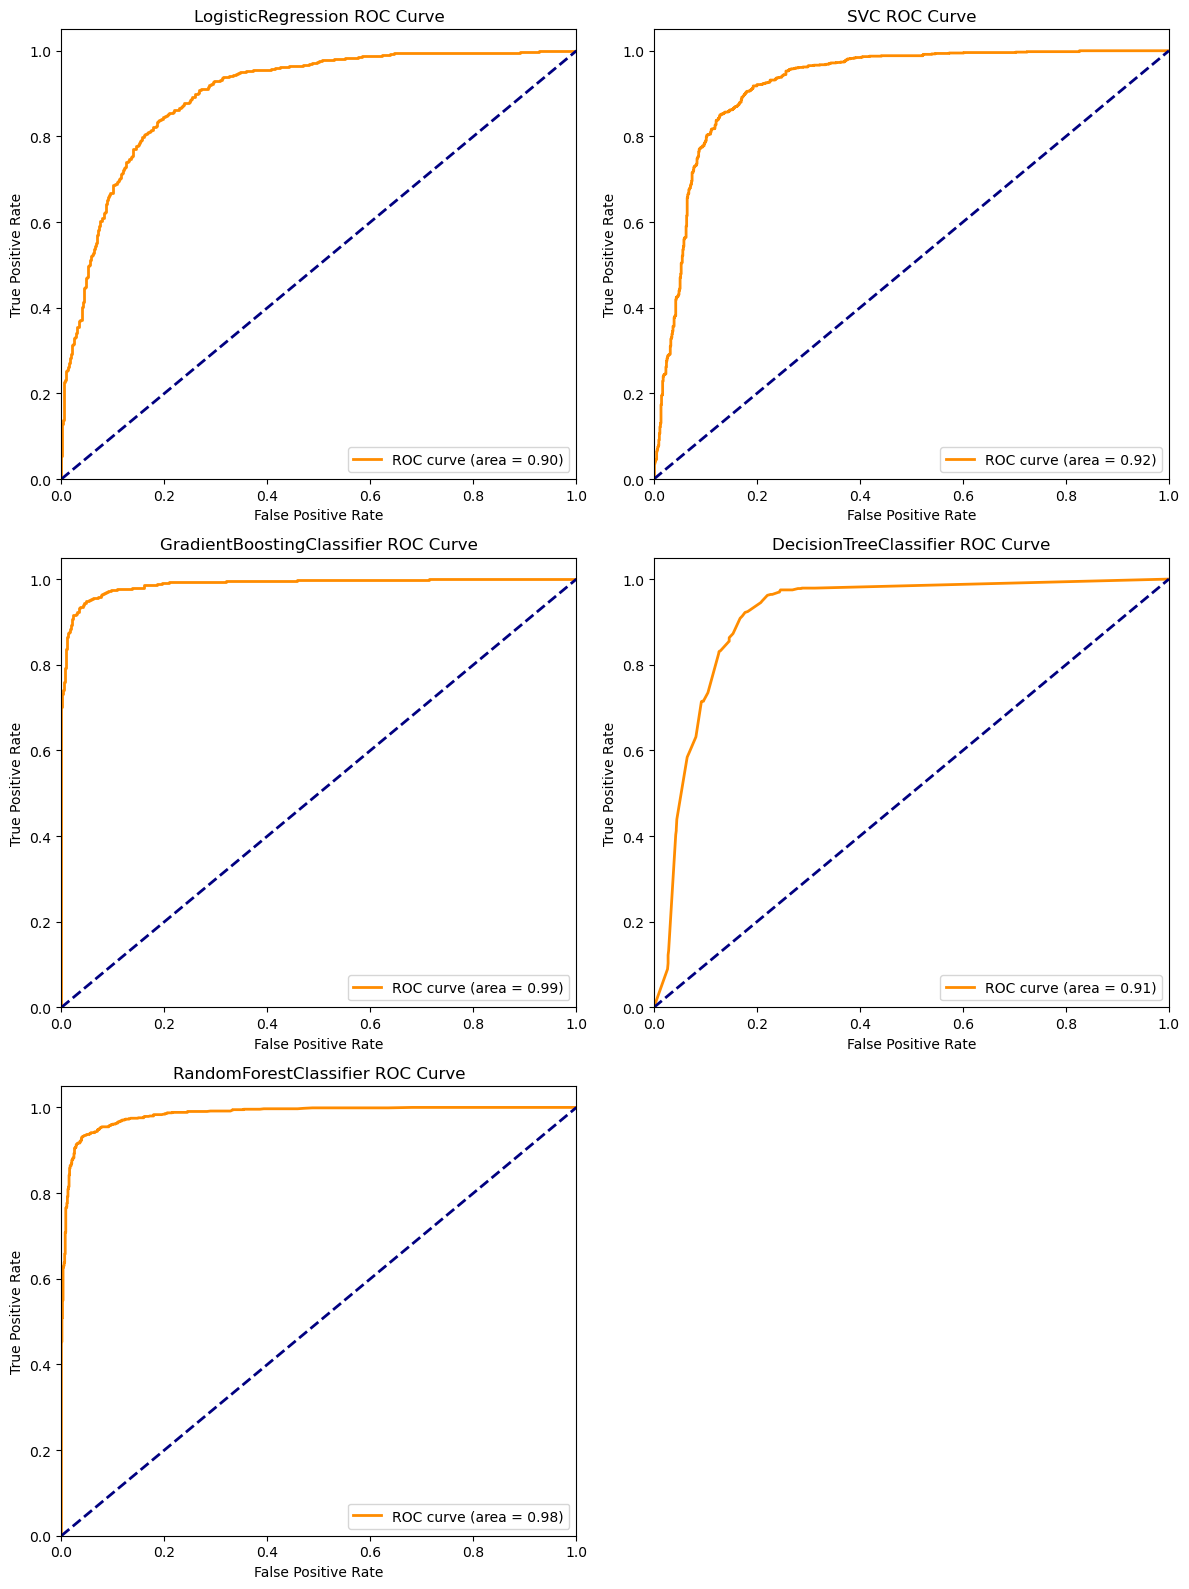

In [46]:
roc_models = [lr, svm, gb, dt, rf]
# Define the number of rows and columns for the subplot grid
num_rows = 3
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 16))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

for i, model in enumerate(roc_models):
       plot_roc_curve(model, X_test, y_test, ax=axes[i])
       axes[i].set_title(f"{model.__class__.__name__} ROC Curve")
# Hide empty subplots if there are fewer categorical features than subplots
for j in range(len(roc_models), len(axes)):
    axes[j].axis('off')
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### Best Model


In [42]:
# Predict the target labels for the test set using the trained XGBoost model
y_pred = gb.predict(X_test)

# Calculate the accuracy score by comparing the predicted labels (y_pred) with the true labels (y_test)
score = accuracy_score(y_test, y_pred) * 100

# Print the accuracy of the model, formatted to display two decimal places
print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 94.24


Shaply Plot

 98%|===================| 1860/1894 [00:49<00:00]        

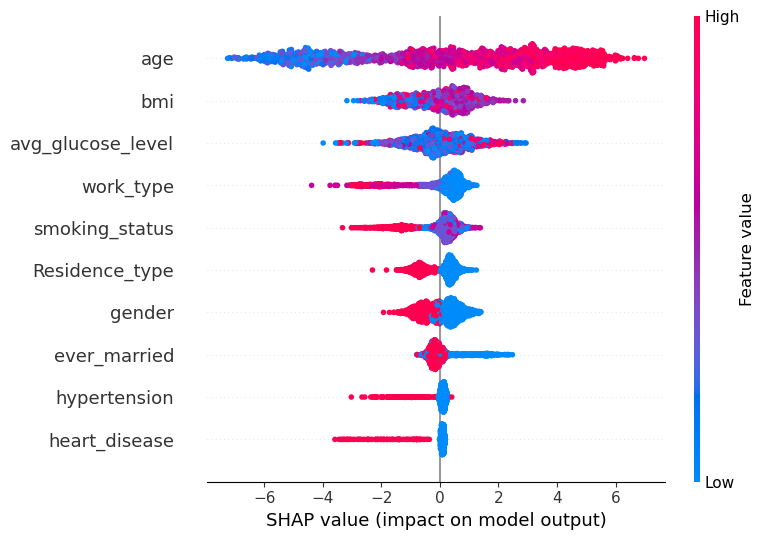

In [43]:
import shap
# Initialize the SHAP explainer
explainer = shap.Explainer(gb, X_train)

# Calculate SHAP values for the test set with additivity check disabled
shap_values = explainer(X_test, check_additivity=False)

# Plot the SHAP summary plot using the actual feature names
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
plt.show()



##### Test best model predictions:

In [44]:
import numpy as np

def make_predictions(model, scaler, input_data, feature_names):
    # Check if input_data has the correct format and length
    if not isinstance(input_data, (tuple, list)):
        raise ValueError("Input data must be a tuple or a list.")
    if len(input_data) != len(feature_names):
        raise ValueError(f"Input data must contain {len(feature_names)} features.")
    
    # Convert input data to a numpy array and create a DataFrame with feature names
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

    # Standardize the input data
    std_data = scaler.transform(input_data_df)

    # Make predictions using the model
    predictions = model.predict(std_data)
    
    return predictions

# Example usage:

import pandas as pd

# Assuming gb is your trained GradientBoostingClassifier model
# Assuming scaler is your fitted StandardScaler
# Assuming X is your original DataFrame used for training with feature names

feature_names = X.columns.tolist()
print(feature_names)

non_stroke_case_data = (1,67.0,0,0,1,2,0,94.61,28.4,2)
stroke_case_data = (0,54.0,0,0,1,2,0,87.85,31.1,2)

try:
    print("Predictions for stroke is:", make_predictions(gb, scaler, stroke_case_data, feature_names))
    print("Predictions for non stroke is:", make_predictions(gb, scaler, non_stroke_case_data, feature_names))
except ValueError as ve:
    print("Error:", ve)


['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
Predictions for stroke is: [1]
Predictions for non stroke is: [0]


Save Best Model in File

In [45]:
# Import the pickle module for serializing and deserializing Python objects
import pickle



# Serialize and save the selected_model object to a binary file named 'best_model.pkl'
pickle.dump(gb, open('../../../../best_model.pkl', 'wb+'))

# Serialize and save the scaler object to a binary file named 'scaler.pkl'
pickle.dump(scaler, open('../../../../scaler.pkl', 'wb+'))
